In [1]:
#importing the librarys I will use in the code
import numpy as np, matplotlib.pyplot as plt, random, math as mat

#this class creates a tree chunk which is a subplot of the total acre
#Attributes - age of the tree chunk and id 
class Treechunk: 
    def __init__(self, id, age = 0):
        self.age = age
        self.id = id

#The Forest class 
class Forest: 
    def __init__(self, foresttype, cin = [0], cout = [0], carbonseq = [0], currentyear = 0, totalseq = 0, startage = 0):
        self.startage = startage

        self.totalyears = 400
        self.currentyear = 0
        self.totalseq = 0

        self.foresttype = foresttype
        
        self.cin = cin
        self.cout = cout
        self.carbonseq = carbonseq

        self.numchunks = 5
        self.treechunks = [Treechunk(id=i) for i in range(self.numchunks)]
        self.start()
    

    def ntrees(self, age, compare = 0): 
        if compare == 0: 
            if age > 20: 
                trees = 73502*age**-1.12 
            else: 
                trees = 1600
        else: 
            if age > 20: 
                trees = 73502*compare**-1.12 - 73502*age**-1.12 
            else: 
                trees = 1600
        return trees/self.numchunks

    
    def biomass(self, age, compare = 0, siteindex = 93.5, alpha = 0.23, beta = 2.22): 
        height = 1.3 + (siteindex-1.3)*(1+mat.exp(8.947-1.357*np.log(49.5)-1.013*np.log(siteindex-1.3))/(1+mat.exp((8.947)-1.357*np.log(age-0.5)-1.013*np.log(siteindex-1.3))))
        total = alpha*(height**beta)
        return total*0.001
    
    
    #func harvest: simulates a harvest by returning how much carbon returns to the atmosphere each time we harvest.  
    def harvest(self, chunk): 
        #harvesting is a special case of tree death, where the age of the tree is equal to the age of the chunk
        #the deathrate is 100% and the carbon returned to the atmosphere is 30% (assumed over 15 years) 
        self.die(self.treechunks[chunk].age,0.3, compare = 0)

        #Setting the plot age to 0 indicates replanting new trees in the clear cut area
        self.treechunks[chunk].age = 1

         
    
    def growth(self, treeage): 
        if self.foresttype == 'old':
            carbonin = ((self.biomass(treeage) - self.biomass(self.startage+self.currentyear))*self.ntrees(treeage))/2
        else: 
            carbonin = (self.biomass(treeage))*self.ntrees(treeage)
        if len(self.cin) < self.currentyear: 
            self.cin.append(carbonin)
        else: 
            self.cin[self.currentyear -1] += carbonin


    def die(self, treeage, atomcarbon, compare): 
        carbonout = self.biomass(treeage)*self.ntrees(treeage, compare)*atomcarbon/2

        if len(self.cout) < self.currentyear: 
            self.cout.append(carbonout)
        else: 
            self.cout[self.currentyear-1] += carbonout


    def annualcarbon(self): 
        for chunk in self.treechunks: 
            self.growth(chunk.age)
            self.die(chunk.age, 0.95, chunk.age - 1)
            chunk.age +=1

        self.totalseq += self.cin[self.currentyear-1] - self.cout[self.currentyear-1]
        self.carbonseq.append(self.totalseq)            

   
    def start(self): 
        self.treechunks = [Treechunk(id=i, age = self.startage) for i in range(self.numchunks)]

        if self.foresttype == "young": 
            chunk = self.numchunks
            while self.currentyear < self.totalyears:
                self.currentyear += 1
                if self.currentyear%20 == 0:
                    self.harvest(chunk-1)
                    if chunk > 1:
                        chunk -= 1
                    else:
                        chunk = self.numchunks
                self.annualcarbon()

        elif self.foresttype == "old": 
            self.totalseq = self.biomass(self.startage)*self.ntrees(self.startage)
            while self.currentyear < self.totalyears:
                self.currentyear +=1
                self.annualcarbon()

        elif self.foresttype == "replaceold":
            self.startage = 0
            chunk = self.numchunks
            self.harvest(chunk-1)
            chunk -=1
            while self.currentyear < self.totalyears:
                self.currentyear += 1
                if self.currentyear%20 == 0:
                    self.harvest(chunk-1)
                    if chunk > 1:
                        chunk -= 1
                    else:
                        chunk = self.numchunks
                self.annualcarbon()
            





/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log


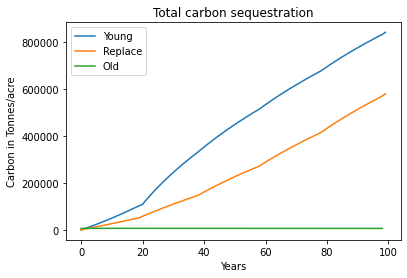

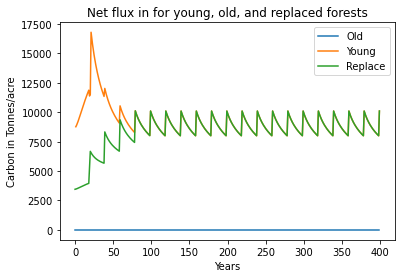

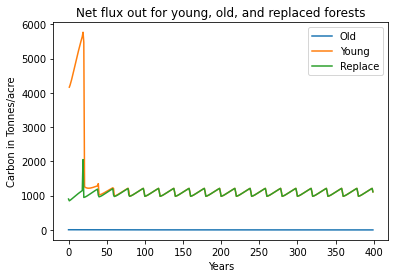

In [2]:
oldforest = Forest('old',  cin = [0], cout = [0], carbonseq = [0], currentyear = 0, totalseq = 0, startage = 200)
youngforest = Forest('young',cin = [0], cout = [0], carbonseq = [0], currentyear = 0, startage = 0)
replaceforest = Forest("replaceold",  cin = [0], cout = [0], carbonseq = [0], currentyear = 0, startage = 200)

oldforest
#plots for carbon sequestration

#plt.plot(oldforest.carbonseq, label = 'Old')
stuff = 0
stuffrepl = 0
carbon = [0]
carbonrepl = [0]
actualold = []
for i in range(99): 
    stuff += (youngforest.cin[i+1] - youngforest.cout[i+1])
    stuffrepl += (replaceforest.cin[i+1] - replaceforest.cout[i+1])
    carbon.append(stuff)
    carbonrepl.append(stuffrepl)
    actualold.append(oldforest.carbonseq[i]+21254*0.3)


plt.plot(carbon,label = 'Young')

plt.plot(carbonrepl,label = "Replace")
plt.plot(actualold, label = "Old")
#plt.plot(Old.carbonsequestration)


plt.legend()
plt.xlabel("Years")
plt.ylabel("Carbon in Tonnes/acre")
plt.title("Total carbon sequestration")

plt.legend()
plt.show()

#plots for in

plt.plot(oldforest.cin, label = 'Old')
plt.plot(youngforest.cin,label = 'Young')
plt.plot(replaceforest.cin,label = "Replace")

plt.legend()
plt.xlabel("Years")
plt.ylabel("Carbon in Tonnes/acre")
plt.title("Net flux in for young, old, and replaced forests")

plt.legend()
plt.show()




#plot for out
plt.plot(oldforest.cout, label = "Old")

plt.plot(youngforest.cout, label = "Young")

plt.plot(replaceforest.cout, label = "Replace")


plt.legend()
plt.xlabel("Years")
plt.ylabel("Carbon in Tonnes/acre")
plt.title("Net flux out for young, old, and replaced forests")
plt.show()





![Picture title](image-20211113-165232.png)

In [3]:


biomasses = []
for age in range(20,150): 
    biomasses.append(biomass(age+1), )

plt.plot(biomasses)



NameError: name 'biomass' is not defined

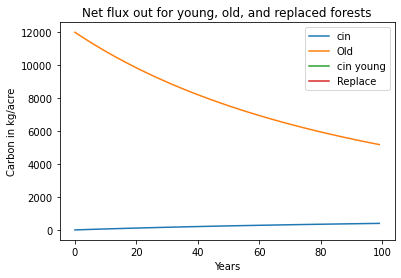

-11476.786672285292

In [ ]:
import numpy as np, matplotlib.pyplot as plt, random, math as mat
def harvest(self, chunk): 
        
    #harvesting is a special case of tree death, where the age of the tree is equal to the age of the chunk
        #the deathrate is 100% and the carbon returned to the atmosphere is 30% (assumed over 100 years) 
    die(self.treechunks[chunk].age, 0.3)

        #Setting the plot age to 0 indicates replanting new trees in the clear cut area
    self.treechunks[chunk].age = 0






cout = []


def die(treeage, atomcarbon, currentyear = 0): 
    carbonout = biomass(treeage, compare = (treeage - 1))*atomcarbon/2
    #if len(cout) < currentyear: 
    cout.append(carbonout)
    #else: 
        #cout[currentyear-1] += carbonout
        
    currentyear +=1
change = 0
biomasses = []
biomassn = []
carbo = [0]
count =0
for age in range(200,300): 
    count +=1
    biomasses.append(biomass(age, compare = age-1))

    change = biomass(age) - biomass(age-1)
    biomassn.append(change +  13700)
    #carbo.append(carbo[count-1] - biomasses[count-1] + biomassn[count-1])


#plt.plot(biomassn, label = 'Biomass gained')
#plt.plot(cout, label = 'carbon')
 
#plt.plot(carbo, label = 'accumulated')

#plt.legend()
#plt.show()
#biomass(200, compare = 199)

#plt.plot(youngforest.cout, label = "Young")
#plt.plot(oldforest.cout, label = "Old")
plt.plot(oldforest.cin, label = "cin")
plt.plot(biomasses, label = 'Old')
#plt.plot(youngforest.cout, label = "Young")
plt.plot(youngforest.cin, label = "cin young")
plt.plot(replaceforest.cin, label = "Replace")
#plt.plot(replaceforest.carbonseq, label = 'young')
#plt.plot(replaceforest.cout, label = "Replace")

plt.legend()
plt.xlabel("Years")
plt.ylabel("Carbon in kg/acre")
plt.title("Net flux out for young, old, and replaced forests")
plt.show()




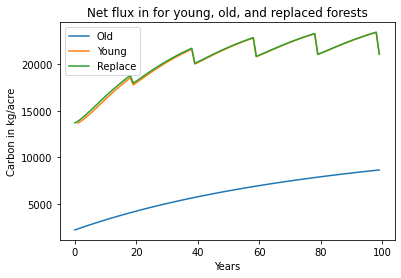

[nan,
 13700.00226015327,
 13897.158948665592,
 14144.253999358998,
 14420.287593473766,
 14714.492835456995,
 15019.913239629892,
 15331.618176546346,
 15645.951280327834,
 15960.138614410462,
 16272.054369678961,
 16580.066764818417,
 16882.929589646235,
 17179.70209115759,
 17469.687730002377,
 17752.386217708,
 18027.455315834603,
 18294.680053816355,
 18553.947727858,
 17784.182443278198,
 18018.274689129248,
 18256.06026963809,
 18493.43990656491,
 18728.385632372596,
 18959.650223144836,
 19186.405324691317,
 19408.08708256597,
 19624.314479115354,
 19834.839802928047,
 20039.51567728656,
 20238.27164656937,
 20431.096786354847,
 20618.02638101949,
 20799.131499480638,
 20974.51072251112,
 21144.28351733362,
 21308.584902301067,
 21467.561138614892,
 21621.366249254286,
 20031.820451097487,
 20190.59445389286,
 20355.46091167195,
 20522.35035353249,
 20689.239473132457,
 20854.865705438933,
 21018.36959622171,
 21179.143928847716,
 21336.754938290214,
 21490.895142623882,
 21641

In [ ]:

#def growth(treeage, currentyear = 0): 
    
    #carbonin = biomass(treeage, compare = 0)/2
    #cin.append(carbonin)
    #else: 
        #cin[currentyear -1] += carbonin
    #currentyear +=1

#growth(100)

#cin

#plt.plot(youngforest.cout, label = "Young")
#plt.plot(oldforest.cout, label = "Old")
#plt.plot(oldforest.cin, label = "cin")
plt.plot(biomassn, label = 'Old')
#plt.plot(youngforest.cout, label = "Young")
plt.plot(youngforest.cin, label = "Young")
plt.plot(replaceforest.cin, label = "Replace")
#plt.plot(replaceforest.carbonseq, label = 'young')
#plt.plot(replaceforest.cout, label = "Replace")

plt.legend()
plt.xlabel("Years")
plt.ylabel("Carbon in kg/acre")
plt.title("Net flux in for young, old, and replaced forests")
plt.show()

youngforest.cin

In [ ]:
def ntrees(age, compare = 0): 
        if compare == 0: 
            if age > 20: 
                trees = 73502*age**-1.12 
            else: 
                trees = 1900
        else: 
            if age > 20: 
                trees = 73502*compare**-1.12 - 73502*age**-1.12 
            else: 
                trees = 1900
        return trees


#in a one acre plot. 
ntrees(200) - ntrees(199)



-1.095572792423667

In [ ]:

def ntrees(age, compare): 
        if compare == 0: 
            if age > 20: 
                trees = 73502*age**-1.12 
            else: 
                trees = 1900
        else: 
            if age > 20: 
                trees = 73502*compare**-1.12-73502*age**-1.12 
            else: 
                trees = 1900
        return trees


def biomass(age, siteindex = 93.5, alpha = 0.23, beta = 2.22, compare = 0): 
        height = 1.3 + (siteindex-1.3)*(1+mat.exp(8.947-1.357*np.log(49.5)-1.013*np.log(siteindex-1.3))/(1+mat.exp((8.947)-1.357*np.log(age-0.5)-1.013*np.log(siteindex-1.3))))
        treebiomass = alpha*(height**beta)
        total = treebiomass*10
        return total*.001

biomass(200)*ntrees(200, 0)


21254.33598395991

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=febf07f8-6860-40a3-ad9d-d8c8457b986d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>